In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'  #한글설정
matplotlib.rcParams['font.size']= 10  #글자크기
matplotlib.rcParams['axes.unicode_minus'] = False


In [3]:
model = keras.models.load_model('cnn_model.keras')


In [4]:
model.layers


[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [7]:
#0번째 input
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer_2>

In [9]:
#0번째 output
model.layers[0].output

<KerasTensor shape=(None, 28, 28, 32), dtype=float32, sparse=False, name=keras_tensor>

In [10]:
# keras.models.Model 넣어서 결과를봄.
#모델을 새롭게 구성
conv_acti= keras.models.Model(model.layers[0].input,model.layers[0].output)

In [ ]:
#데이터를 1개 뽑아서, 위 model에 넣어서 확인

In [13]:
(train_input,train_target),(test_input,test_target)=keras.datasets.fashion_mnist.load_data()

In [11]:
model.layers

[<Conv2D name=conv2d_3, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Conv2D name=conv2d_4, built=True>,
 <MaxPooling2D name=max_pooling2d_4, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

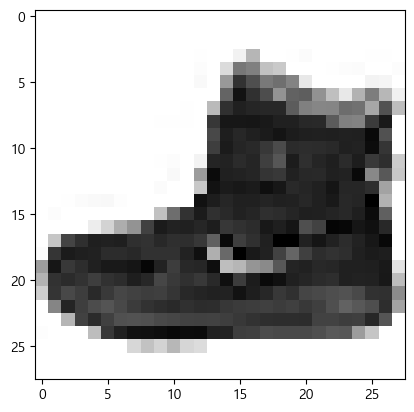

In [14]:
#train_input[0] 데이터를 위 model을 가지고 예측
plt.imshow(train_input[0],cmap='gray_r')
plt.show()

In [16]:
#train_input[0] 데이터를 위 model을 가지고 예측
#2차원 행렬 ->3차원 행렬변경/ 255
input = train_input[0:1].reshape(-1,28,28,1)/255

#1개를 예측, 임시model(conv_acti)에서 predict
feature_maps=conv_acti.predict(input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [17]:
#32개 필터의 활성화 맵이 구성됨.
print(feature_maps.shape)

(1, 28, 28, 32)


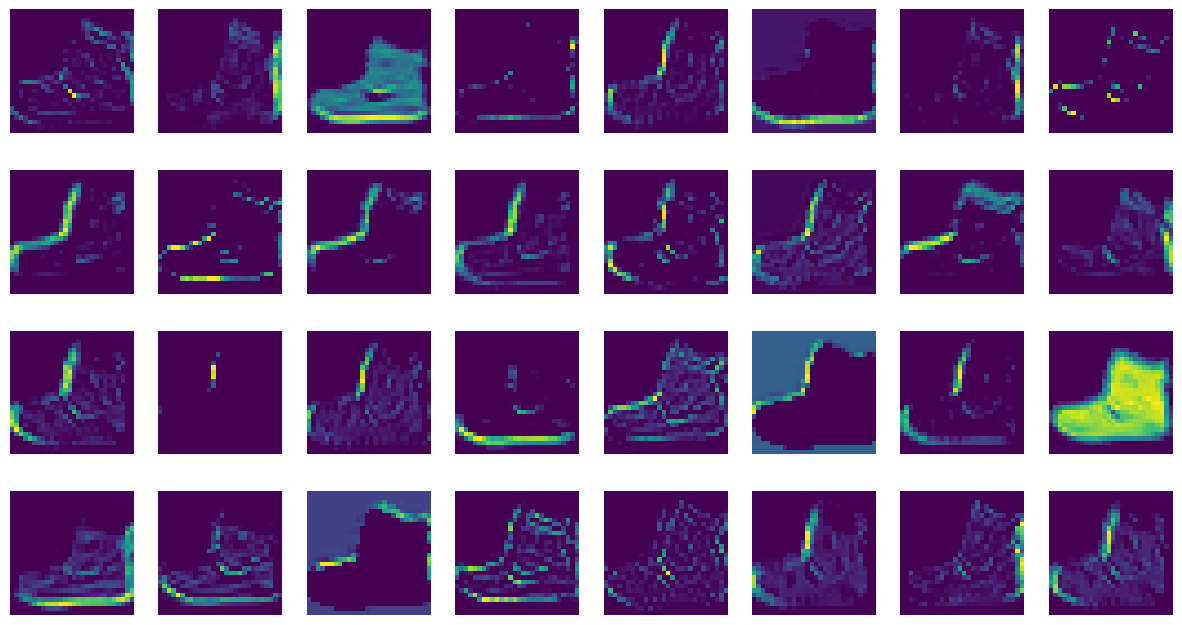

In [19]:
#그래프출력 -활성화맵(가중치 결과) 32장의 이미지 출력
fig,axs = plt.subplots(4,8,figsize=(15,8))
for i in range(4):
    for j in range(8):
        axs[i,j].imshow(feature_maps[0,:,:,i*8+j])
        axs[i,j].axis('off')